# Loading libraries and dataset

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [3]:
# read the date source
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# check the shape of the data
print(train_df.shape)
print(test_df.shape)


(750000, 18)
(250000, 17)


# Preprocessing the data

In [4]:
# show the first 5 rows of the data
train_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [6]:
# check for data types
train_df.dtypes

id            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [7]:
# check for missing values
train_df.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

We see that there are no null values which is good for us and less work for us

In [8]:
# check for duplicates
train_df.duplicated().sum()


np.int64(0)

In [14]:
train_df.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [15]:
# show unique categories in categorical varible 
train_df.select_dtypes(include=['object']).nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

In [16]:
# Explore categorical variables and their categories

# First, let's identify categorical columns (object type columns)
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)
print("Number of categorical columns:", len(categorical_cols))


Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Number of categorical columns: 9


In [ ]:
# See unique values for each categorical column
print("=== UNIQUE VALUES IN EACH CATEGORICAL COLUMN ===\n")

for col in categorical_cols:
    unique_values = train_df[col].unique()
    print(f"{col.upper()}:")
    print(f"  Number of unique values: {len(unique_values)}")
    print(f"  Categories: {list(unique_values)}")
    print(f"  Data type: {train_df[col].dtype}")
    print("-" * 50)


=== UNIQUE VALUES IN EACH CATEGORICAL COLUMN ===

JOB:
  Number of unique values: 12
  Categories: ['technician', 'blue-collar', 'student', 'admin.', 'management', 'entrepreneur', 'self-employed', 'unknown', 'services', 'retired', 'housemaid', 'unemployed']
  Data type: object
--------------------------------------------------
MARITAL:
  Number of unique values: 3
  Categories: ['married', 'single', 'divorced']
  Data type: object
--------------------------------------------------
EDUCATION:
  Number of unique values: 4
  Categories: ['secondary', 'primary', 'tertiary', 'unknown']
  Data type: object
--------------------------------------------------
DEFAULT:
  Number of unique values: 2
  Categories: ['no', 'yes']
  Data type: object
--------------------------------------------------
HOUSING:
  Number of unique values: 2
  Categories: ['no', 'yes']
  Data type: object
--------------------------------------------------
LOAN:
  Number of unique values: 2
  Categories: ['no', 'yes']
  Da

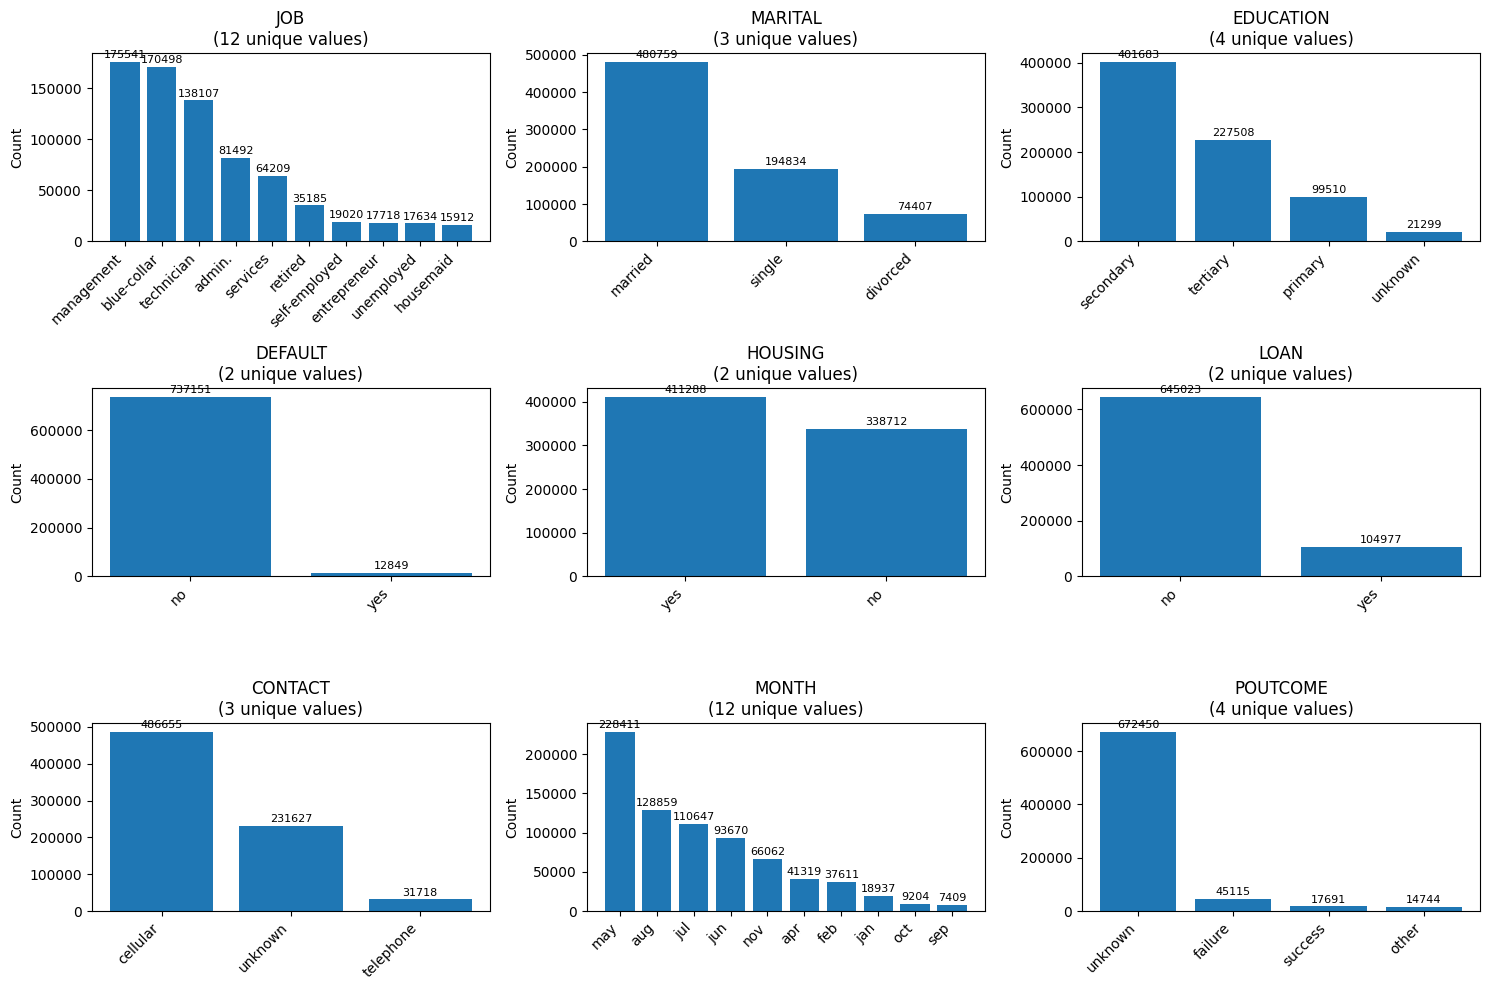

In [ ]:
# Visual exploration of categorical variables
plt.figure(figsize=(15, 10))

# Calculate number of subplots needed
n_cols = len(categorical_cols)
n_rows = (n_cols + 2) // 3  # 3 columns per row

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, 3, i)
    
    # Create value counts and limit to top 10 for readability
    value_counts = train_df[col].value_counts().head(10)
    
    plt.bar(range(len(value_counts)), value_counts.values)
    plt.title(f'{col.upper()}\n({train_df[col].nunique()} unique values)')
    plt.xticks(range(len(value_counts)), value_counts.index, rotation=45, ha='right')
    plt.ylabel('Count')
    
    # Add value labels on bars
    for j, v in enumerate(value_counts.values):
        plt.text(j, v + max(value_counts.values) * 0.01, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


## Some vizualisations and statistical analysis

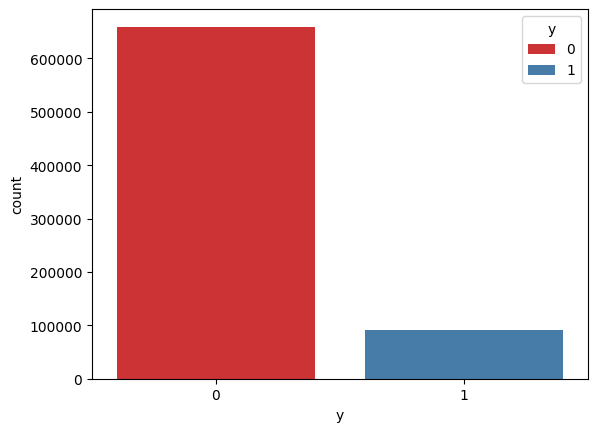

In [25]:
# check the distribution of the target variable
sns.countplot(x='y', data=train_df, hue='y', palette='Set1')
plt.show()

We see som data imbalance with the target variables.

Looking for outliers in numerica variables

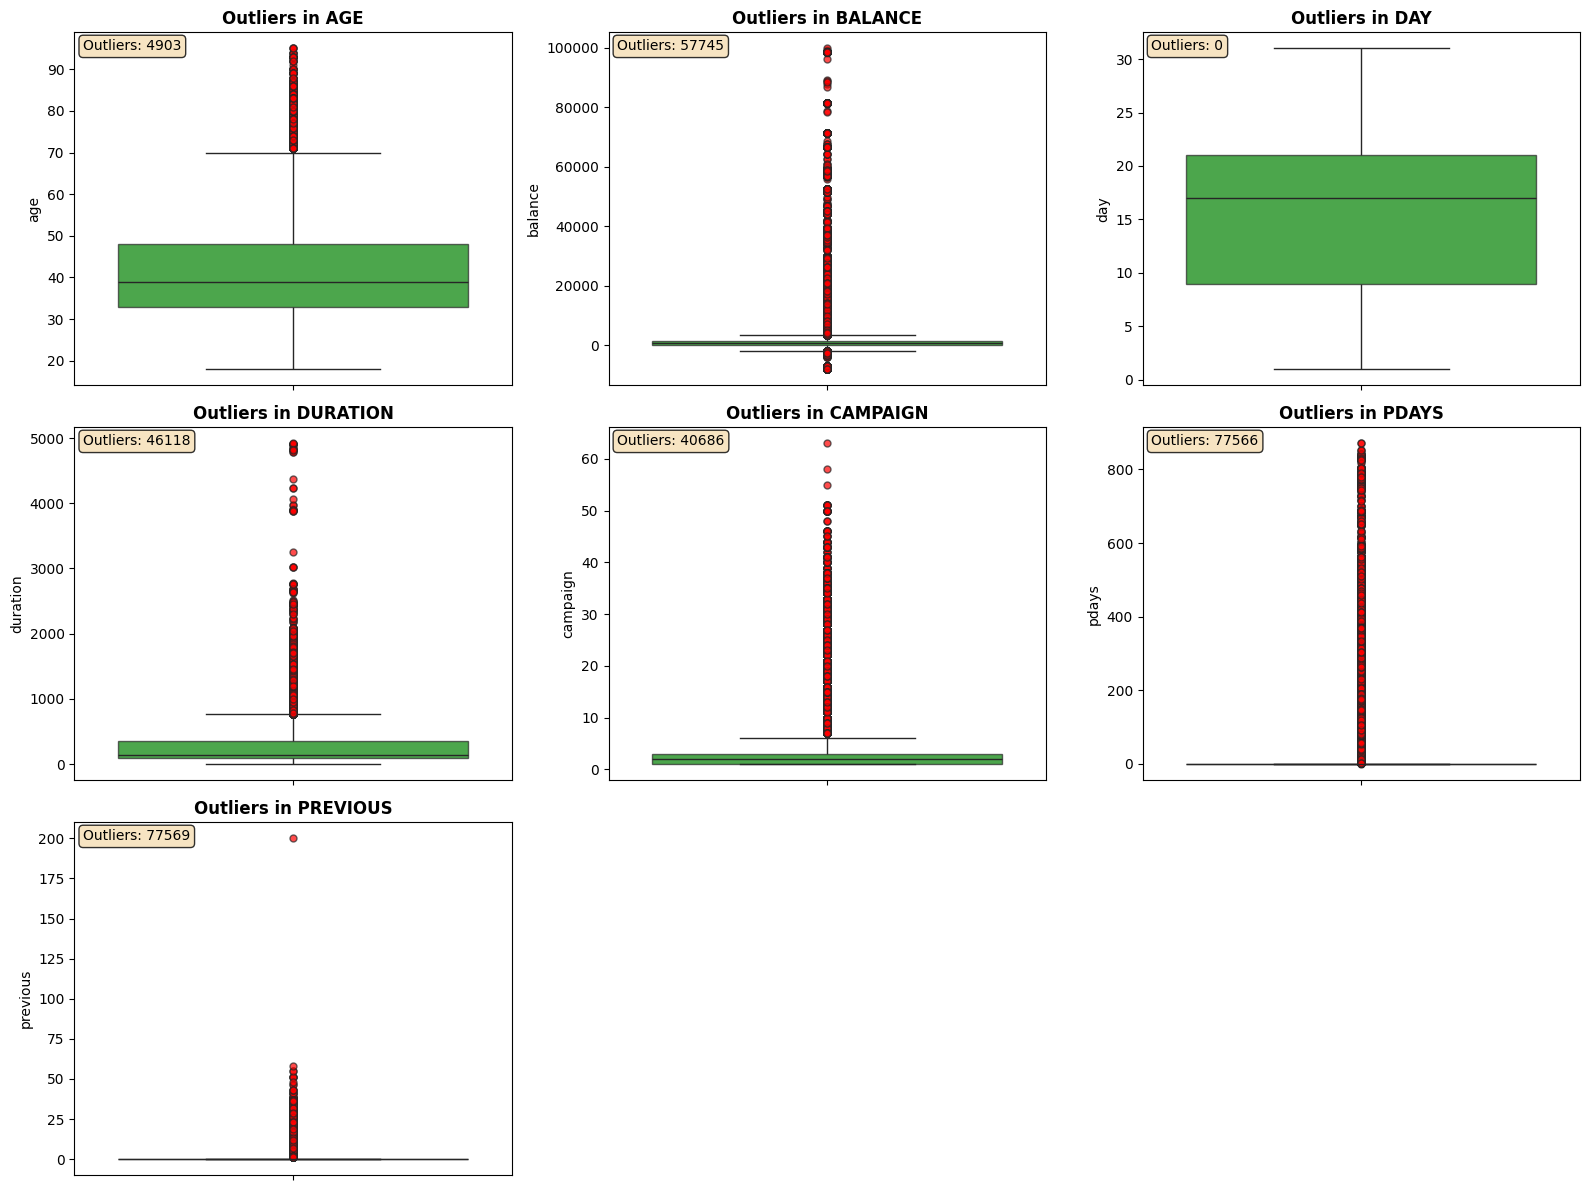

In [33]:
# Box plots with different colors and better styling
# First, identify numerical columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove 'id' and target 'y' if they exist
numerical_cols = [col for col in numerical_cols if col not in ['id', 'y']]

plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, 3, i)
    box_plot = sns.boxplot(y=train_df[col], color='green', 
                          boxprops=dict(facecolor='green', alpha=0.7),
                          flierprops=dict(marker='o', markerfacecolor='red', 
                                        markersize=5, alpha=0.7))
    plt.title(f'Outliers in {col.upper()}', fontsize=12, fontweight='bold')
    plt.ylabel(col)
    
    # Add statistics
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = train_df[(train_df[col] < Q1 - 1.5*IQR) | (train_df[col] > Q3 + 1.5*IQR)][col]
    plt.text(0.02, 0.98, f'Outliers: {len(outliers)}', transform=plt.gca().transAxes, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

In [28]:
# Statistical summary of outliers
print("=== OUTLIER ANALYSIS SUMMARY ===\n")

for col in numerical_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
    
    print(f"{col.upper()}:")
    print(f"  Q1: {Q1:.2f}")
    print(f"  Q3: {Q3:.2f}")
    print(f"  IQR: {IQR:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}")
    print(f"  Upper Bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(train_df)*100:.2f}%)")
    print(f"  Min outlier: {outliers[col].min() if len(outliers) > 0 else 'None'}")
    print(f"  Max outlier: {outliers[col].max() if len(outliers) > 0 else 'None'}")
    print("-" * 50)

=== OUTLIER ANALYSIS SUMMARY ===

AGE:
  Q1: 33.00
  Q3: 48.00
  IQR: 15.00
  Lower Bound: 10.50
  Upper Bound: 70.50
  Number of outliers: 4903 (0.65%)
  Min outlier: 71
  Max outlier: 95
--------------------------------------------------
BALANCE:
  Q1: 0.00
  Q3: 1390.00
  IQR: 1390.00
  Lower Bound: -2085.00
  Upper Bound: 3475.00
  Number of outliers: 57745 (7.70%)
  Min outlier: -8019
  Max outlier: 99717
--------------------------------------------------
DAY:
  Q1: 9.00
  Q3: 21.00
  IQR: 12.00
  Lower Bound: -9.00
  Upper Bound: 39.00
  Number of outliers: 0 (0.00%)
  Min outlier: None
  Max outlier: None
--------------------------------------------------
DURATION:
  Q1: 91.00
  Q3: 361.00
  IQR: 270.00
  Lower Bound: -314.00
  Upper Bound: 766.00
  Number of outliers: 46118 (6.15%)
  Min outlier: 767
  Max outlier: 4918
--------------------------------------------------
CAMPAIGN:
  Q1: 1.00
  Q3: 3.00
  IQR: 2.00
  Lower Bound: -2.00
  Upper Bound: 6.00
  Number of outliers: 40

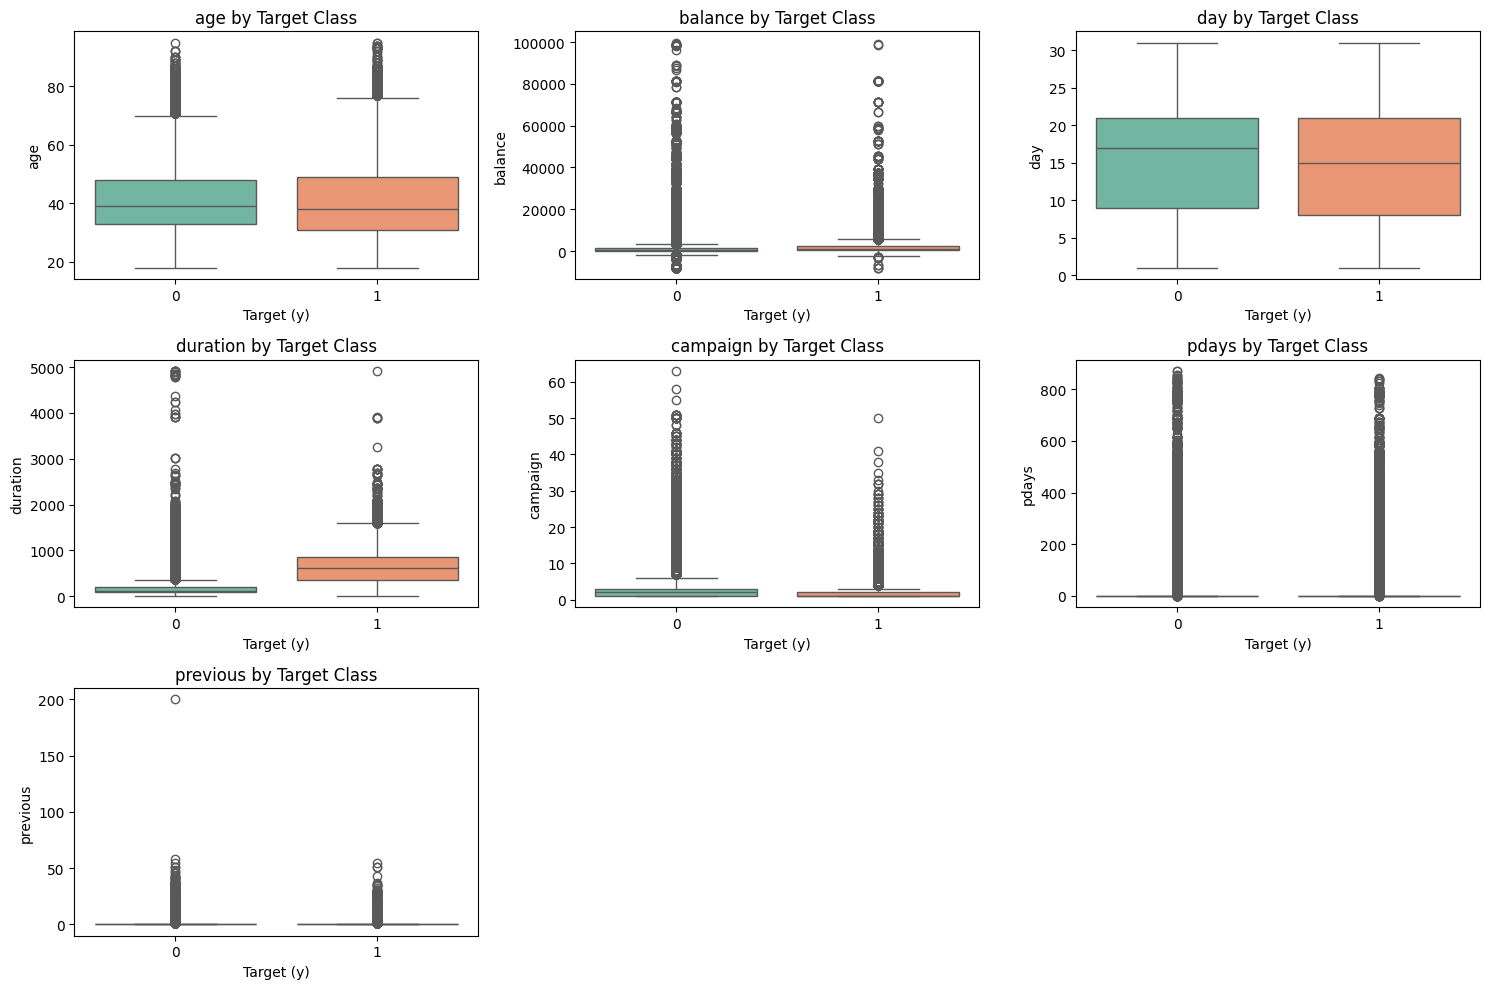

In [32]:
# Box plots by target class (to see if outliers differ by class)
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, 3, i)
    sns.boxplot(x='y', y=col, data=train_df, hue='y', palette='Set2', legend=False)
    plt.title(f'{col} by Target Class')
    plt.xlabel('Target (y)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

We see that thera re many outliers and the range of data is also very varying, so I will standardize teh daatset just to make classifciation easier for models

Now that we have standardized the dataset, now we can conver the categorical variables to labels

In [35]:
# Fix: Create label encoded datasets if they don't exist
# This ensures we have the variables needed for standardization

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Check if we need to create the encoded datasets
try:
    print("Checking if train_encoded exists...")
    print("train_encoded shape:", train_encoded.shape)
except NameError:
    print("Creating label encoded datasets...")
    
    # Create label encoded datasets
    train_encoded = train_df.copy()
    test_encoded = test_df.copy()
    
    # Get categorical columns
    categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
    print("Categorical columns to encode:", categorical_cols)
    
    # Apply label encoding
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        train_encoded[col] = le.fit_transform(train_df[col])
        # Handle test data safely
        test_encoded[col] = test_encoded[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
        label_encoders[col] = le
        print(f"Encoded {col}")
    
    print("Label encoding completed!")

print(f"Final encoded datasets - Train: {train_encoded.shape}, Test: {test_encoded.shape}")


Checking if train_encoded exists...
Creating label encoded datasets...
Categorical columns to encode: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Encoded job
Encoded marital
Encoded education
Encoded default
Encoded housing
Encoded loan
Encoded contact
Encoded month
Encoded poutcome
Label encoding completed!
Final encoded datasets - Train: (750000, 18), Test: (250000, 17)


In [36]:
# Now apply standardization to ALL features (numerical + encoded categorical)

# Get all feature columns (exclude 'id' and target 'y' if they exist)
feature_cols = [col for col in train_encoded.columns if col not in ['id', 'y']]
print("Features to standardize:", feature_cols)
print(f"Number of features: {len(feature_cols)}")

# Initialize the scaler
scaler_final = StandardScaler()

# Create final processed datasets
train_final = train_encoded.copy()
test_final = test_encoded.copy()

# Apply standardization
print("Applying standardization...")
train_final[feature_cols] = scaler_final.fit_transform(train_encoded[feature_cols])
test_final[feature_cols] = scaler_final.transform(test_encoded[feature_cols])

print("Standardization completed!")
print(f"Final datasets - Train: {train_final.shape}, Test: {test_final.shape}")

# Verify standardization worked
print(f"\nVerification:")
print(f"Mean range: {train_final[feature_cols].mean().min():.6f} to {train_final[feature_cols].mean().max():.6f}")
print(f"Std range: {train_final[feature_cols].std().min():.6f} to {train_final[feature_cols].std().max():.6f}")


Features to standardize: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
Number of features: 16
Applying standardization...
Standardization completed!
Final datasets - Train: (750000, 18), Test: (250000, 17)

Verification:
Mean range: -0.000000 to 0.000000
Std range: 1.000001 to 1.000001


# Starting with the good old logistic regression for binary classification

In [37]:
# Split training data into train and validation sets (70-30 split)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Prepare the features and target
X = train_final.drop(['y', 'id'], axis=1, errors='ignore')  # Features
y = train_final['y']  # Target

print("Original dataset shape:", X.shape)
print("Target distribution:")
print(y.value_counts(normalize=True))

# Split into train and validation sets (70-30 split)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y  # Ensures both sets have same class distribution
)

print(f"\nAfter split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Training target distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Validation target distribution:\n{y_val.value_counts(normalize=True)}")

Original dataset shape: (750000, 16)
Target distribution:
y
0    0.879349
1    0.120651
Name: proportion, dtype: float64

After split:
Training set: 525000 samples
Validation set: 225000 samples
Training target distribution:
y
0    0.879349
1    0.120651
Name: proportion, dtype: float64
Validation target distribution:
y
0    0.879351
1    0.120649
Name: proportion, dtype: float64


In [38]:
# Train Logistic Regression
print("Training Logistic Regression...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
train_predictions = lr_model.predict(X_train)
val_predictions = lr_model.predict(X_val)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, train_predictions)
val_accuracy = accuracy_score(y_val, val_predictions)

print(f"\n=== MODEL PERFORMANCE ===")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Difference (overfitting check): {train_accuracy - val_accuracy:.4f}")

if abs(train_accuracy - val_accuracy) < 0.02:
    print("Good! Low overfitting")
elif train_accuracy - val_accuracy > 0.05:
    print("Possible overfitting")
else:
    print("Reasonable performance")

Training Logistic Regression...

=== MODEL PERFORMANCE ===
Training Accuracy: 0.9027
Validation Accuracy: 0.9024
Difference (overfitting check): 0.0002
Good! Low overfitting


In [39]:
# Detailed evaluation on validation set
print("\n=== VALIDATION SET EVALUATION ===")
print("\nClassification Report:")
print(classification_report(y_val, val_predictions))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_val, val_predictions)
print(cm)

# Calculate additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_val, val_predictions)
recall = recall_score(y_val, val_predictions)
f1 = f1_score(y_val, val_predictions)

print(f"\nKey Metrics on Validation Set:")
print(f"Accuracy:  {val_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")


=== VALIDATION SET EVALUATION ===

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95    197854
           1       0.65      0.41      0.50     27146

    accuracy                           0.90    225000
   macro avg       0.79      0.69      0.73    225000
weighted avg       0.89      0.90      0.89    225000


Confusion Matrix:
[[191879   5975]
 [ 15978  11168]]

Key Metrics on Validation Set:
Accuracy:  0.9024
Precision: 0.6515
Recall:    0.4114
F1-Score:  0.5043



=== TOP 10 MOST IMPORTANT FEATURES ===
      feature  coefficient  abs_coefficient
11   duration     1.390113         1.390113
8     contact    -0.595964         0.595964
6     housing    -0.584206         0.584206
12   campaign    -0.530152         0.530152
7        loan    -0.333642         0.333642
14   previous     0.234354         0.234354
13      pdays     0.206024         0.206024
2     marital     0.187880         0.187880
15   poutcome     0.172158         0.172158
3   education     0.160456         0.160456


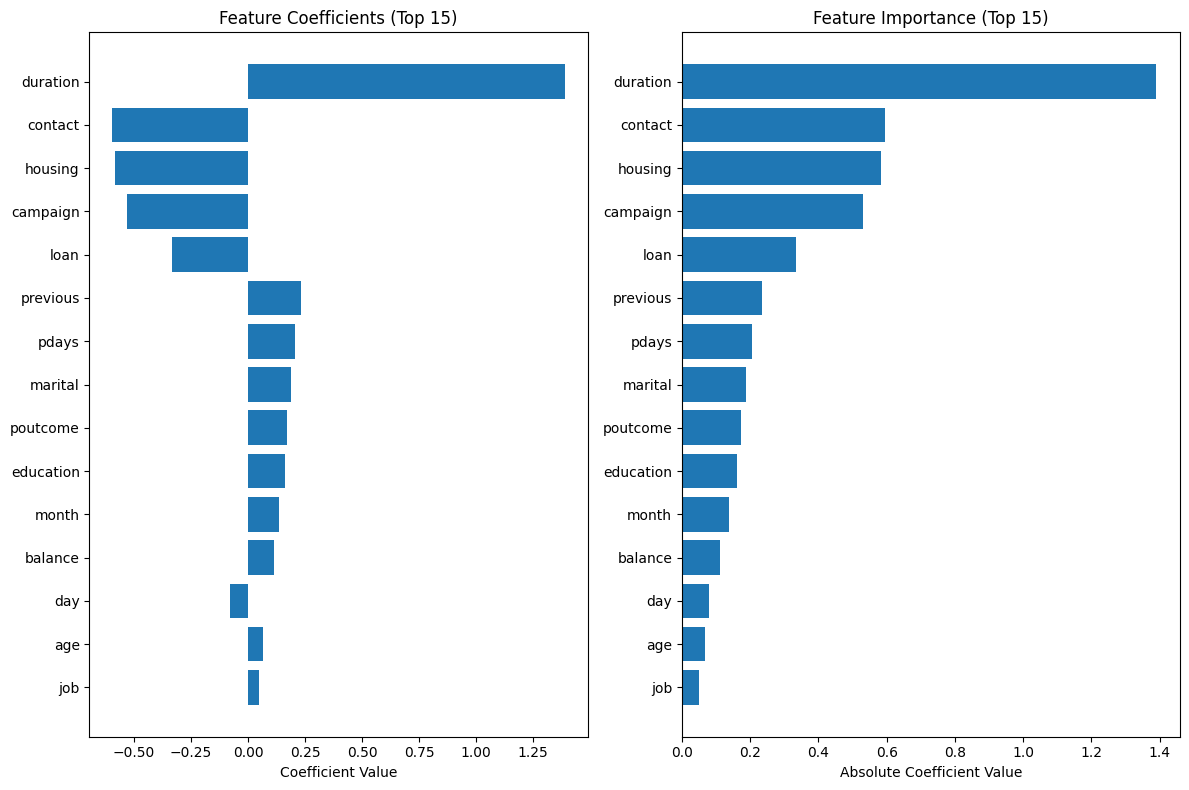

In [40]:
# Feature importance analysis
feature_names = X_train.columns
coefficients = lr_model.coef_[0]

# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_coefficient': np.abs(coefficients)
}).sort_values('abs_coefficient', ascending=False)

print("\n=== TOP 10 MOST IMPORTANT FEATURES ===")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)

plt.subplot(1, 2, 1)
plt.barh(range(len(top_features)), top_features['coefficient'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients (Top 15)')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(range(len(top_features)), top_features['abs_coefficient'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance (Top 15)')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [41]:
# Cross-validation for more robust evaluation
from sklearn.model_selection import cross_val_score

print("\n=== CROSS-VALIDATION RESULTS ===")
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"5-Fold CV Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")
print(f"95% Confidence Interval: [{cv_scores.mean() - 2*cv_scores.std():.4f}, {cv_scores.mean() + 2*cv_scores.std():.4f}]")

# Compare with validation accuracy
print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print(f"CV Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Difference: {abs(val_accuracy - cv_scores.mean()):.4f}")


=== CROSS-VALIDATION RESULTS ===
5-Fold CV Scores: [0.90281905 0.90259048 0.901      0.90365714 0.9034    ]
Mean CV Accuracy: 0.9027
Standard Deviation: 0.0009
95% Confidence Interval: [0.9008, 0.9046]

Validation Accuracy: 0.9024
CV Mean Accuracy: 0.9027
Difference: 0.0003


In [42]:
# ROC AUC Analysis for Class Imbalanced Dataset
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

# Get prediction probabilities (essential for ROC AUC)
train_proba = lr_model.predict_proba(X_train)[:, 1]  # Probability of class 1
val_proba = lr_model.predict_proba(X_val)[:, 1]    # Probability of class 1

# Calculate ROC AUC scores
train_roc_auc = roc_auc_score(y_train, train_proba)
val_roc_auc = roc_auc_score(y_val, val_proba)

print("=== ROC AUC ANALYSIS ===")
print(f"Training ROC AUC:   {train_roc_auc:.4f}")
print(f"Validation ROC AUC: {val_roc_auc:.4f}")
print(f"Difference:         {train_roc_auc - val_roc_auc:.4f}")

# ROC AUC interpretation
if val_roc_auc > 0.9:
    print("Excellent performance!")
elif val_roc_auc > 0.8:
    print("Good performance")
elif val_roc_auc > 0.7:
    print("Fair performance")
else:
    print("Poor performance")

=== ROC AUC ANALYSIS ===
Training ROC AUC:   0.9199
Validation ROC AUC: 0.9206
Difference:         -0.0007
Excellent performance!


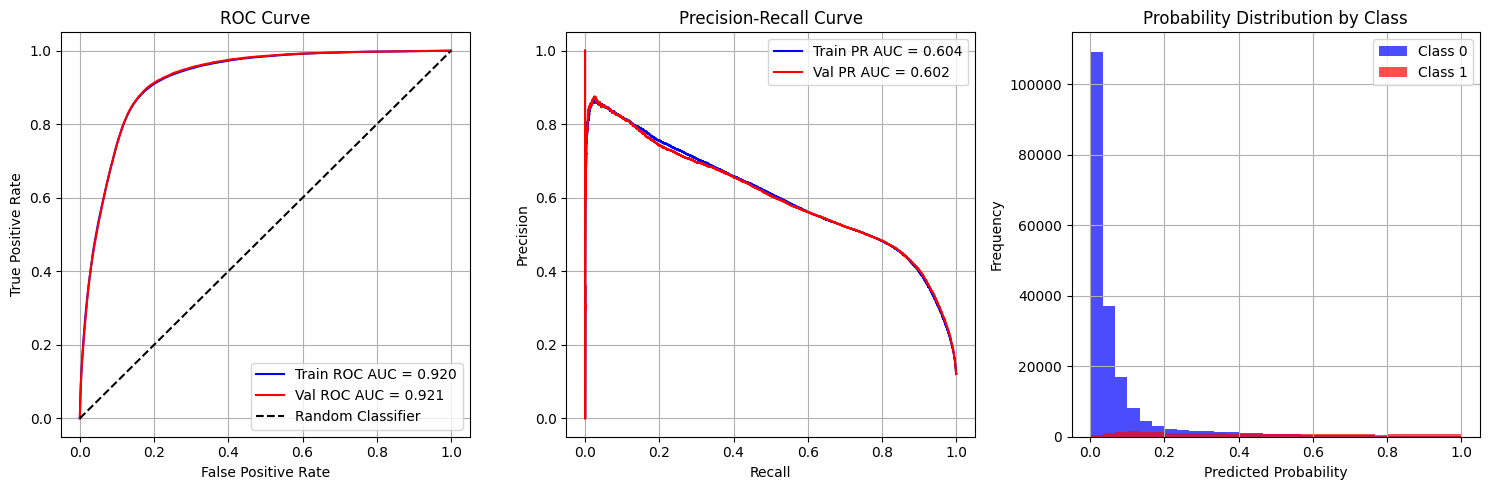


Precision-Recall AUC:
Training PR AUC:   0.6045
Validation PR AUC: 0.6023


In [43]:
# Plot ROC Curve
plt.figure(figsize=(15, 5))

# ROC Curve
plt.subplot(1, 3, 1)
fpr_train, tpr_train, _ = roc_curve(y_train, train_proba)
fpr_val, tpr_val, _ = roc_curve(y_val, val_proba)

plt.plot(fpr_train, tpr_train, label=f'Train ROC AUC = {train_roc_auc:.3f}', color='blue')
plt.plot(fpr_val, tpr_val, label=f'Val ROC AUC = {val_roc_auc:.3f}', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)

# Precision-Recall Curve (better for imbalanced datasets)
plt.subplot(1, 3, 2)
precision_train, recall_train, _ = precision_recall_curve(y_train, train_proba)
precision_val, recall_val, _ = precision_recall_curve(y_val, val_proba)

train_pr_auc = average_precision_score(y_train, train_proba)
val_pr_auc = average_precision_score(y_val, val_proba)

plt.plot(recall_train, precision_train, label=f'Train PR AUC = {train_pr_auc:.3f}', color='blue')
plt.plot(recall_val, precision_val, label=f'Val PR AUC = {val_pr_auc:.3f}', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)

# Probability Distribution
plt.subplot(1, 3, 3)
plt.hist(val_proba[y_val == 0], bins=30, alpha=0.7, label='Class 0', color='blue')
plt.hist(val_proba[y_val == 1], bins=30, alpha=0.7, label='Class 1', color='red')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Probability Distribution by Class')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"\nPrecision-Recall AUC:")
print(f"Training PR AUC:   {train_pr_auc:.4f}")
print(f"Validation PR AUC: {val_pr_auc:.4f}")

In [44]:
# Comprehensive metrics for imbalanced classification
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

print("=== COMPREHENSIVE EVALUATION FOR IMBALANCED DATA ===\n")

# Different threshold analysis
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
print("Performance at different thresholds:")
print("Threshold | Accuracy | Precision | Recall | F1-Score | ROC AUC")
print("-" * 65)

for threshold in thresholds:
    # Make predictions with custom threshold
    val_pred_thresh = (val_proba >= threshold).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, val_pred_thresh)
    precision = precision_score(y_val, val_pred_thresh)
    recall = recall_score(y_val, val_pred_thresh)
    f1 = f1_score(y_val, val_pred_thresh)
    
    print(f"{threshold:9.1f} | {accuracy:8.4f} | {precision:9.4f} | {recall:6.4f} | {f1:8.4f} | {val_roc_auc:7.4f}")

# Find optimal threshold using F1-score
f1_scores = []
thresholds_detailed = np.arange(0.1, 0.9, 0.05)

for thresh in thresholds_detailed:
    pred_thresh = (val_proba >= thresh).astype(int)
    f1 = f1_score(y_val, pred_thresh)
    f1_scores.append(f1)

optimal_threshold = thresholds_detailed[np.argmax(f1_scores)]
print(f"\nOptimal threshold (max F1): {optimal_threshold:.2f}")
print(f"Max F1-score: {max(f1_scores):.4f}")

=== COMPREHENSIVE EVALUATION FOR IMBALANCED DATA ===

Performance at different thresholds:
Threshold | Accuracy | Precision | Recall | F1-Score | ROC AUC
-----------------------------------------------------------------
      0.3 |   0.8942 |    0.5560 | 0.6129 |   0.5831 |  0.9206
      0.4 |   0.9001 |    0.6024 | 0.5069 |   0.5505 |  0.9206
      0.5 |   0.9024 |    0.6515 | 0.4114 |   0.5043 |  0.9206
      0.6 |   0.9007 |    0.6910 | 0.3202 |   0.4376 |  0.9206
      0.7 |   0.8971 |    0.7272 | 0.2348 |   0.3550 |  0.9206

Optimal threshold (max F1): 0.20
Max F1-score: 0.6018


In [45]:
# Final model evaluation with optimal threshold
optimal_val_pred = (val_proba >= optimal_threshold).astype(int)

print(f"=== FINAL EVALUATION (Threshold = {optimal_threshold:.2f}) ===")
print("\nConfusion Matrix:")
cm = confusion_matrix(y_val, optimal_val_pred)
print(cm)

print(f"\nFinal Metrics:")
print(f"ROC AUC:    {val_roc_auc:.4f}")
print(f"PR AUC:     {val_pr_auc:.4f}")
print(f"Accuracy:   {accuracy_score(y_val, optimal_val_pred):.4f}")
print(f"Precision:  {precision_score(y_val, optimal_val_pred):.4f}")
print(f"Recall:     {recall_score(y_val, optimal_val_pred):.4f}")
print(f"F1-Score:   {f1_score(y_val, optimal_val_pred):.4f}")

# Class-wise performance
print(f"\nDetailed Classification Report:")
print(classification_report(y_val, optimal_val_pred))

=== FINAL EVALUATION (Threshold = 0.20) ===

Confusion Matrix:
[[178642  19212]
 [  7195  19951]]

Final Metrics:
ROC AUC:    0.9206
PR AUC:     0.6023
Accuracy:   0.8826
Precision:  0.5094
Recall:     0.7350
F1-Score:   0.6018

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93    197854
           1       0.51      0.73      0.60     27146

    accuracy                           0.88    225000
   macro avg       0.74      0.82      0.77    225000
weighted avg       0.91      0.88      0.89    225000



In [46]:
# Use the already processed test data for predictions
# test_final is already encoded and standardized

print("=== MAKING PREDICTIONS ON PROCESSED TEST DATA ===")
print(f"Using preprocessed test data shape: {test_final.shape}")

# Get feature columns (exclude 'id' if present)
test_features = test_final.drop(['id'], axis=1, errors='ignore')
print(f"Features for prediction: {test_features.shape}")

# Make probability predictions using the trained logistic regression model
test_probabilities = lr_model.predict_proba(test_features)[:, 1]
print(f"Probability predictions generated: {test_probabilities.shape}")

# Apply the optimal threshold (0.20) from validation results
optimal_threshold = 0.20
test_predictions = (test_probabilities >= optimal_threshold).astype(int)

print(f"\nUsing optimal threshold: {optimal_threshold}")
print(f"Prediction distribution:")
print(f"  Class 0: {(test_predictions == 0).sum():,} ({(test_predictions == 0).mean()*100:.1f}%)")
print(f"  Class 1: {(test_predictions == 1).sum():,} ({(test_predictions == 1).mean()*100:.1f}%)")

=== MAKING PREDICTIONS ON PROCESSED TEST DATA ===
Using preprocessed test data shape: (250000, 17)
Features for prediction: (250000, 16)
Probability predictions generated: (250000,)

Using optimal threshold: 0.2
Prediction distribution:
  Class 0: 206,640 (82.7%)
  Class 1: 43,360 (17.3%)


In [47]:
# Create submission file
print("\n=== CREATING KAGGLE SUBMISSION ===")

# Get original test IDs (from the original test.csv)
test_df_original = pd.read_csv('test.csv')
test_ids = test_df_original['id']

# Create submission dataframe
submission = pd.DataFrame({
    'id': test_ids,
    'y': test_predictions
})

# Save the submission file
submission_filename = "submission_lr.csv"
submission.to_csv(submission_filename, index=False)

print(f"Submission saved as: {submission_filename}")
print(f"\nSubmission summary:")
print(f"  Total predictions: {len(submission):,}")
print(f"  Class 0 predictions: {(submission['y'] == 0).sum():,}")
print(f"  Class 1 predictions: {(submission['y'] == 1).sum():,}")
print(f"  Class 1 percentage: {(submission['y'] == 1).mean()*100:.2f}%")

# Show sample predictions
print(f"\nFirst 10 predictions:")
print(submission.head(10))

print(f"\nLast 5 predictions:")
print(submission.tail(5))


=== CREATING KAGGLE SUBMISSION ===
Submission saved as: submission_lr.csv

Submission summary:
  Total predictions: 250,000
  Class 0 predictions: 206,640
  Class 1 predictions: 43,360
  Class 1 percentage: 17.34%

First 10 predictions:
       id  y
0  750000  0
1  750001  1
2  750002  0
3  750003  0
4  750004  0
5  750005  0
6  750006  1
7  750007  1
8  750008  0
9  750009  1

Last 5 predictions:
            id  y
249995  999995  0
249996  999996  1
249997  999997  1
249998  999998  0
249999  999999  0


The results fo logistic regression are okay, but let me just do an xgboost regression and see it works or not.

Best iteration: 1999
Best val AUC: 0.9657567109101137
Validation ROC-AUC: 0.9658
Validation PR-AUC:  0.7903


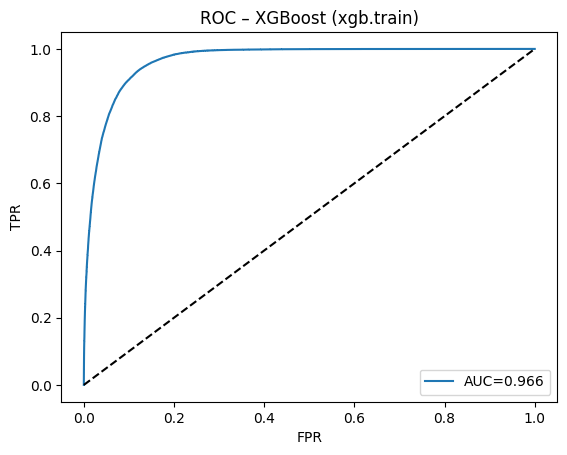

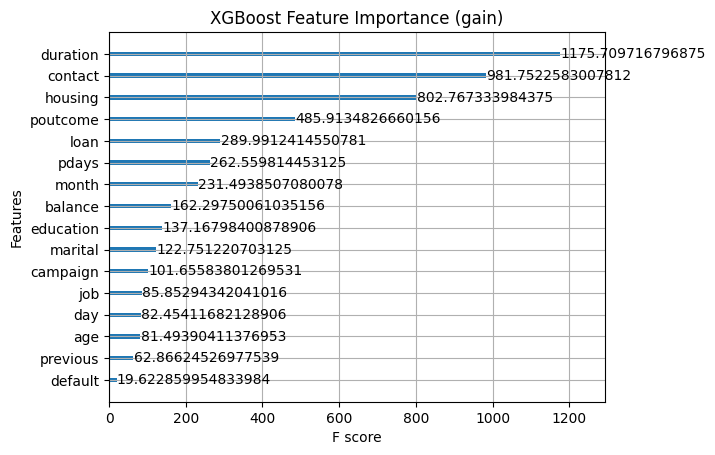

In [53]:
# === XGBoost with xgb.train + early stopping (ROC-AUC, imbalance-aware) ===
import xgboost as xgb
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, average_precision_score
import matplotlib.pyplot as plt

# Handle class imbalance
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

# Build DMatrix (optionally pass feature_names=list(X_train.columns))
dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_val,   label=y_val)

params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",      # ROC-AUC
    "eta": 0.03,               # learning_rate
    "max_depth": 4,
    "subsample": 0.9,
    "colsample_bytree": 0.9,
    "lambda": 1.0,             # L2 reg
    "alpha": 0.0,              # L1 reg
    "min_child_weight": 1.0,
    "scale_pos_weight": scale_pos_weight,
    "seed": 42,
}

watchlist = [(dtrain, "train"), (dval, "val")]

bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=2000,
    evals=watchlist,
    early_stopping_rounds=50,   # <-- works here
    verbose_eval=False
)

print("Best iteration:", bst.best_iteration)
print("Best val AUC:", bst.best_score)

# Predict using best iteration
y_proba = bst.predict(dval, iteration_range=(0, bst.best_iteration + 1))

# Metrics: ROC-AUC (and PR-AUC, often better with heavy imbalance)
roc_auc = roc_auc_score(y_val, y_proba)
pr_auc  = average_precision_score(y_val, y_proba)
print(f"Validation ROC-AUC: {roc_auc:.4f}")
print(f"Validation PR-AUC:  {pr_auc:.4f}")

# ROC curve
fpr, tpr, _ = roc_curve(y_val, y_proba)
plt.plot(fpr, tpr, label=f"AUC={roc_auc:.3f}")
plt.plot([0,1],[0,1],"k--"); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC – XGBoost (xgb.train)"); plt.legend(); plt.show()

# Feature importance (gain)
xgb.plot_importance(bst, importance_type="gain")
plt.title("XGBoost Feature Importance (gain)")
plt.show()

# Optional: save model
bst.save_model("xgb_bank_binary.json")


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best CV ROC-AUC: 0.9659
Best params: {'subsample': 0.7, 'reg_lambda': 2.0, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 8, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.7}
Best iteration: 1441
Best val AUC from training: 0.967452023101119
Validation ROC-AUC: 0.9675
Validation PR-AUC:  0.8035


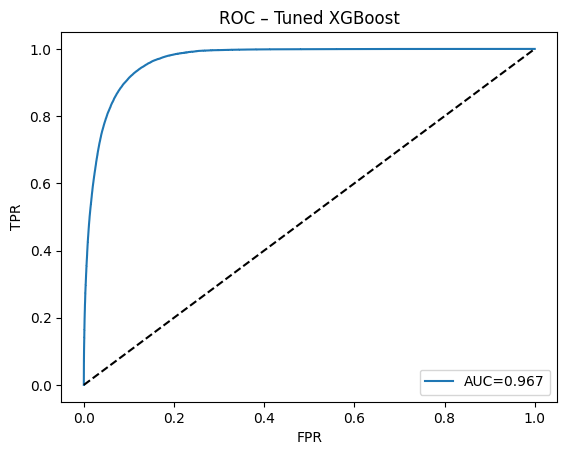

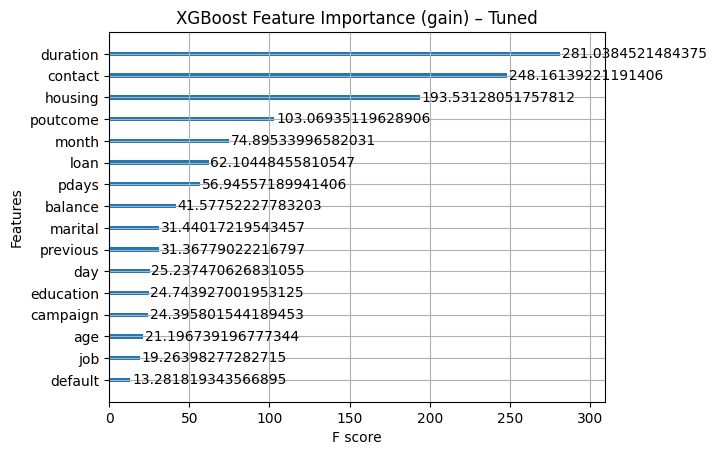

In [54]:
# === Hyperparameter tuning (ROC-AUC) + final train with early stopping ===
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, average_precision_score
from xgboost import XGBClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

# 1) class imbalance weight
spw = np.sum(y_train == 0) / np.sum(y_train == 1)

# 2) randomized grid (fast, strong). Keep ranges tight to save time.
param_dist = {
    "max_depth": [3, 4, 5, 6],
    "min_child_weight": [1, 2, 4, 6, 8],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    "learning_rate": [0.02, 0.03, 0.05, 0.08],
    "reg_lambda": [0.5, 1.0, 2.0, 5.0, 10.0],
    "reg_alpha": [0.0, 0.1, 0.5, 1.0],
    "gamma": [0, 0.5, 1.0, 2.0],
    # use a moderate n_estimators for CV since we can't early stop inside CV
    "n_estimators": [300, 500, 700]
}

# 3) CV setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4) base model (sklearn API just for search)
xgb_skl = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    scale_pos_weight=spw,
    n_jobs=-1,
    tree_method="auto",
    random_state=42
)

# 5) search
search = RandomizedSearchCV(
    estimator=xgb_skl,
    param_distributions=param_dist,
    n_iter=40,                # increase for more thorough search
    scoring="roc_auc",
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
search.fit(X_train, y_train)

print("Best CV ROC-AUC:", round(search.best_score_, 4))
print("Best params:", search.best_params_)

# 6) Retrain FINAL model with xgb.train using best params + early stopping on val
best = search.best_params_
params_train = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "eta": best["learning_rate"],
    "max_depth": best["max_depth"],
    "min_child_weight": best["min_child_weight"],
    "subsample": best["subsample"],
    "colsample_bytree": best["colsample_bytree"],
    "lambda": best["reg_lambda"],
    "alpha": best["reg_alpha"],
    "gamma": best["gamma"],
    "scale_pos_weight": spw,
    "seed": 42,
}

dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_val,   label=y_val)
watchlist = [(dtrain, "train"), (dval, "val")]

bst = xgb.train(
    params=params_train,
    dtrain=dtrain,
    num_boost_round=3000,             # large cap
    evals=watchlist,
    early_stopping_rounds=100,        # early stopping now applied on validation
    verbose_eval=False
)

print("Best iteration:", bst.best_iteration)
print("Best val AUC from training:", bst.best_score)

# 7) Evaluate on validation
y_proba = bst.predict(dval, iteration_range=(0, bst.best_iteration + 1))
roc_auc = roc_auc_score(y_val, y_proba)
pr_auc  = average_precision_score(y_val, y_proba)
print(f"Validation ROC-AUC: {roc_auc:.4f}")
print(f"Validation PR-AUC:  {pr_auc:.4f}")

# ROC curve
fpr, tpr, _ = roc_curve(y_val, y_proba)
plt.plot(fpr, tpr, label=f"AUC={roc_auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC – Tuned XGBoost"); plt.legend(); plt.show()

# Feature importance
xgb.plot_importance(bst, importance_type="gain")
plt.title("XGBoost Feature Importance (gain) – Tuned")
plt.show()


/Users/saroshfarhan/Documents/DataScience/kaggle-binary-class-banking/venv/lib/python3.9/site-packages/optuna/_experimental.py:32: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-08-29 01:39:58,967] A new study created in memory with name: no-name-0eef388f-7b14-4e9b-9894-5faa837cff61
  0%|          | 0/8 [07:02<?, ?it/s]

[I 2025-08-29 01:47:01,914] Trial 0 finished with value: 0.9674001162268195 and parameters: {'eta': 0.030710573677773714, 'max_depth': 8, 'min_child_weight': 7.610418378407853, 'gamma': 0.24810409748678114, 'subsample': 0.6624074561769746, 'colsample_bytree': 0.662397808134481, 'reg_lambda': 0.017073967431528128, 'reg_alpha': 2.915443189153755}. Best is trial 0 with value: 0.9674001162268195.


Best trial: 0. Best value: 0.9674:  12%|█▎        | 1/8 [17:11<49:25, 423.58s/it]

[I 2025-08-29 01:57:10,242] Trial 1 finished with value: 0.966185056948363 and parameters: {'eta': 0.06054365855469249, 'max_depth': 7, 'min_child_weight': 1.0587323928728434, 'gamma': 7.5794799533480015, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'reg_lambda': 0.053370327626039576, 'reg_alpha': 0.00541524411940254}. Best is trial 0 with value: 0.9674001162268195.


Best trial: 0. Best value: 0.9674:  25%|██▌       | 2/8 [30:48<53:12, 532.16s/it]

[I 2025-08-29 02:10:47,272] Trial 2 finished with value: 0.967131547021659 and parameters: {'eta': 0.024878734419814436, 'max_depth': 6, 'min_child_weight': 3.3121776961890665, 'gamma': 0.014618962793704969, 'subsample': 0.8447411578889518, 'colsample_bytree': 0.6557975442608167, 'reg_lambda': 0.14742753159914673, 'reg_alpha': 0.029204338471814112}. Best is trial 0 with value: 0.9674001162268195.


Best trial: 0. Best value: 0.9674:  38%|███▊      | 3/8 [38:13<55:11, 662.24s/it]

[I 2025-08-29 02:18:12,101] Trial 3 finished with value: 0.9672806809549555 and parameters: {'eta': 0.03920673972242137, 'max_depth': 7, 'min_child_weight': 1.739527068447246, 'gamma': 0.11400863701127326, 'subsample': 0.836965827544817, 'colsample_bytree': 0.6185801650879991, 'reg_lambda': 2.6926469100861796, 'reg_alpha': 0.004809461967501573}. Best is trial 0 with value: 0.9674001162268195.


Best trial: 0. Best value: 0.9674:  50%|█████     | 4/8 [53:18<38:25, 576.47s/it]

[I 2025-08-29 02:33:17,243] Trial 4 finished with value: 0.9675420749890498 and parameters: {'eta': 0.012151617026673379, 'max_depth': 8, 'min_child_weight': 14.545773709691234, 'gamma': 1.7123375973163983, 'subsample': 0.7218455076693483, 'colsample_bytree': 0.6390688456025535, 'reg_lambda': 5.4567254856014795, 'reg_alpha': 0.057624872164786005}. Best is trial 4 with value: 0.9675420749890498.


Best trial: 4. Best value: 0.967542:  62%|██████▎   | 5/8 [1:11:38<34:44, 694.94s/it]

[I 2025-08-29 02:51:37,323] Trial 5 finished with value: 0.9661731451505503 and parameters: {'eta': 0.014413697528610409, 'max_depth': 5, 'min_child_weight': 1.1000385512911883, 'gamma': 4.33792069749094, 'subsample': 0.7035119926400067, 'colsample_bytree': 0.8650089137415928, 'reg_lambda': 0.17654048052495078, 'reg_alpha': 0.12030178871154672}. Best is trial 4 with value: 0.9675420749890498.


Best trial: 4. Best value: 0.967542:  75%|███████▌  | 6/8 [1:32:04<27:45, 832.68s/it]

[I 2025-08-29 03:12:02,552] Trial 6 finished with value: 0.9666645908851536 and parameters: {'eta': 0.05143828405076928, 'max_depth': 4, 'min_child_weight': 14.706056330309123, 'gamma': 1.2604664585649463, 'subsample': 0.9757995766256756, 'colsample_bytree': 0.9579309401710595, 'reg_lambda': 2.463768595899747, 'reg_alpha': 4.8696409415209025}. Best is trial 4 with value: 0.9675420749890498.


Best trial: 4. Best value: 0.967542:  88%|████████▊ | 7/8 [1:52:59<16:01, 961.04s/it]

[I 2025-08-29 03:32:58,902] Trial 7 finished with value: 0.9644815184161629 and parameters: {'eta': 0.01303561122512888, 'max_depth': 4, 'min_child_weight': 1.133598029551558, 'gamma': 0.02001342062287998, 'subsample': 0.7554709158757927, 'colsample_bytree': 0.7085396127095583, 'reg_lambda': 20.651425578959262, 'reg_alpha': 0.026730883107816707}. Best is trial 4 with value: 0.9675420749890498.


Best trial: 4. Best value: 0.967542: 100%|██████████| 8/8 [1:53:00<00:00, 847.57s/it] 


Best CV AUC: 0.9675
Best params: {'eta': 0.012151617026673379, 'max_depth': 8, 'min_child_weight': 14.545773709691234, 'gamma': 1.7123375973163983, 'subsample': 0.7218455076693483, 'colsample_bytree': 0.6390688456025535, 'reg_lambda': 5.4567254856014795, 'reg_alpha': 0.057624872164786005}
Best CV iters: 3000
Best iteration: 2998
Best val AUC (training log): 0.96777817913196
Validation ROC-AUC: 0.9678
Validation PR-AUC:  0.8054


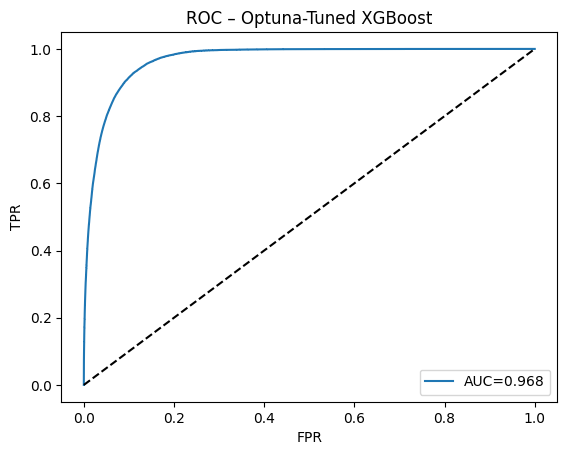

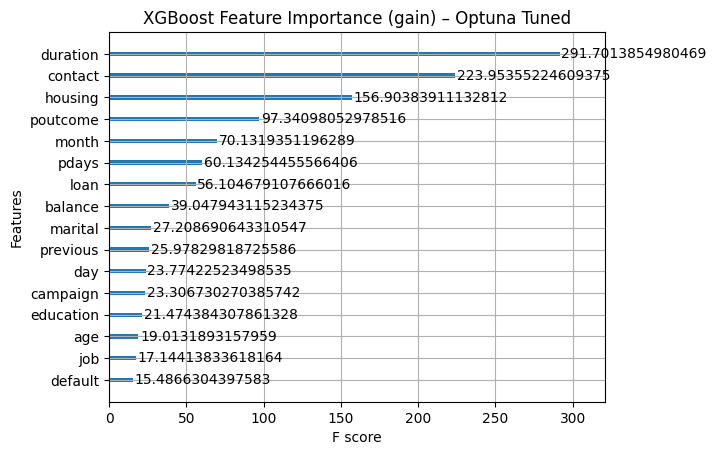

In [57]:
# === Optuna + XGBoost (AUC) with early stopping + final fit ===

import optuna
import numpy as np
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, average_precision_score
import matplotlib.pyplot as plt

# Handle class imbalance
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

# Build DMatrix for CV (on training only)
dtrain_full = xgb.DMatrix(X_train, label=y_train)

# Stratified folds for classification
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
folds = list(skf.split(X_train, y_train))

def objective(trial: optuna.Trial):
    params = {
        "objective": "binary:logistic",
        "eval_metric": "auc",
        # learning params
        "eta": trial.suggest_float("eta", 0.01, 0.2, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "min_child_weight": trial.suggest_float("min_child_weight", 1.0, 16.0, log=True),
        "gamma": trial.suggest_float("gamma", 1e-3, 10.0, log=True),
        # sampling
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        # regularization
        "lambda": trial.suggest_float("reg_lambda", 1e-2, 100.0, log=True),
        "alpha": trial.suggest_float("reg_alpha", 1e-3, 10.0, log=True),
        # class imbalance
        "scale_pos_weight": scale_pos_weight,
        "seed": 42,
    }

    # Early stopping inside CV
    cv = xgb.cv(
        params=params,
        dtrain=dtrain_full,
        num_boost_round=3000,
        folds=folds,                 # stratified
        early_stopping_rounds=100,
        verbose_eval=False,
        as_pandas=True,
        shuffle=False
    )

    # xgb.cv returns a DataFrame with 'test-auc-mean'
    best_score = float(cv["test-auc-mean"].max())
    best_iter  = int(cv["test-auc-mean"].idxmax()) + 1

    # report to Optuna for pruning
    trial.set_user_attr("best_iter", best_iter)
    return best_score

#  Run the study (MedianPruner cuts bad trials early)
# study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())
# study.optimize(objective, n_trials=8, timeout=None, show_progress_bar=True)

sampler = optuna.samplers.TPESampler(n_startup_trials=10, multivariate=True, seed=42)
pruner  = optuna.pruners.SuccessiveHalvingPruner(min_resource=100, reduction_factor=4)

study = optuna.create_study(direction="maximize", sampler=sampler, pruner=pruner)
study.optimize(objective, n_trials=8, timeout=None, show_progress_bar=True, gc_after_trial=True)

print("Best CV AUC:", round(study.best_value, 4))
print("Best params:", study.best_params)
print("Best CV iters:", study.best_trial.user_attrs["best_iter"])

# Train FINAL model on train set, validate on X_val with early stopping
best = study.best_params
params_final = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "eta": best["eta"],
    "max_depth": best["max_depth"],
    "min_child_weight": best["min_child_weight"],
    "gamma": best["gamma"],
    "subsample": best["subsample"],
    "colsample_bytree": best["colsample_bytree"],
    "lambda": best["reg_lambda"],
    "alpha": best["reg_alpha"],
    "scale_pos_weight": scale_pos_weight,
    "seed": 42,
}

dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_val,   label=y_val)

watchlist = [(dtrain, "train"), (dval, "val")]
bst = xgb.train(
    params=params_final,
    dtrain=dtrain,
    num_boost_round=3000,
    evals=watchlist,
    early_stopping_rounds=100,
    verbose_eval=False
)

print("Best iteration:", bst.best_iteration)
print("Best val AUC (training log):", bst.best_score)

# Evaluate on validation
y_proba = bst.predict(dval, iteration_range=(0, bst.best_iteration + 1))
roc_auc = roc_auc_score(y_val, y_proba)
pr_auc  = average_precision_score(y_val, y_proba)
print(f"Validation ROC-AUC: {roc_auc:.4f}")
print(f"Validation PR-AUC:  {pr_auc:.4f}")

# ROC curve
fpr, tpr, _ = roc_curve(y_val, y_proba)
plt.plot(fpr, tpr, label=f"AUC={roc_auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC – Optuna-Tuned XGBoost"); plt.legend(); plt.show()

# Feature importance
xgb.plot_importance(bst, importance_type="gain")
plt.title("XGBoost Feature Importance (gain) – Optuna Tuned")
plt.show()


The results look goog with AUC = 0.968, let me now create the submission file

In [ ]:
def _get_test_features():
    if 'test_final' in globals():
        tf = test_final.copy()
    elif 'test_df' in globals():
        tf = test_df.copy()
    else:
        tf = pd.read_csv('test.csv')  # expects an 'id' column
    Xtest = tf.drop(['id'], axis=1, errors='ignore')

    # Align columns to training features if X_train has named columns
    if 'X_train' in globals() and hasattr(X_train, 'columns'):
        train_cols = list(X_train.columns)
        # add any missing columns (fill with 0) and drop unseen extras
        for c in train_cols:
            if c not in Xtest.columns:
                Xtest[c] = 0
        Xtest = Xtest[train_cols]

    # ensure numeric (in case of any stray object columns)
    Xtest = Xtest.apply(pd.to_numeric, errors='coerce').fillna(0)
    return tf, Xtest

test_frame, Xtest = _get_test_features()
print("Test features shape:", Xtest.shape)

# 2) Pick a decision threshold from validation (Youden’s J).
def _best_threshold_from_val():
    try:
        dval = xgb.DMatrix(X_val)
        val_proba = bst.predict(dval, iteration_range=(0, bst.best_iteration + 1))
        fpr, tpr, thr = roc_curve(y_val, val_proba)
        j = tpr - fpr
        return float(thr[j.argmax()])
    except Exception as e:
        print("Could not compute threshold from validation; defaulting to 0.5. Reason:", e)
        return 0.5

threshold = _best_threshold_from_val()
print(f"Using threshold: {threshold:.4f}")

# 3) Predict on test
dtest = xgb.DMatrix(Xtest)
test_proba = bst.predict(dtest, iteration_range=(0, bst.best_iteration + 1))
test_pred  = (test_proba >= threshold).astype(int)

# 4) Get IDs
if 'id' in test_frame.columns:
    ids = test_frame['id']
else:
    ids = pd.read_csv('test.csv')['id']

# 5) Save submissions
submission = pd.DataFrame({"id": ids, "y": test_pred})
submission.to_csv("submission_xgb.csv", index=False)

pd.DataFrame({"id": ids, "y_proba": test_proba}).to_csv("submission_xgb_proba.csv", index=False)

print("\nSaved:")
print(" - submission_xgb.csv (labels)")
print(" - submission_xgb_proba.csv (probabilities)")
print(f"Class 1 rate in submission: {submission['y'].mean()*100:.2f}%")
print("\nHead:")
print(submission.head(10))




Test features shape: (250000, 16)
Using threshold: 0.4953

Saved:
 - submission_xgb.csv (labels)
 - submission_xgb_proba.csv (probabilities)
Class 1 rate in submission: 20.81%

Head:
       id  y
0  750000  0
1  750001  0
2  750002  0
3  750003  0
4  750004  0
5  750005  0
6  750006  1
7  750007  1
8  750008  0
9  750009  1
